# Gerardo Daniel Vega Rosales

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def printDataSetInfo(dataset):
    print(f"{'*'*50} DataSet Information {'*'*50}")
    print(f"Dimensiones del dataset {dataset.shape}")
    print("Columnas")
    print(dataset.columns)
    print("Tipos")
    print(dataset.dtypes)    
    
    print()
    print("Verificando los valores nulos del dataset")
    columnas = dataset.columns
    for col in columnas:
        porcentaje = dataset[col].isnull().mean()
        if(porcentaje > 0):
            print(f"{col}: {porcentaje}")
    print()
   
    print("Valores Estadisticos de las columnas")
    for col in columnas:
        df_describe = dataset[col].describe()
        print(col)
        print("Media",df_describe['mean'])
        print("Maximo",df_describe['max'])        
        print("Minimo",df_describe['min'])        
        print("Rango" ,df_describe['max']- df_describe['min'])
        print("Desviacion",df_describe['std'])
        sns.displot(dataset[col])
        plt.show()
        print("-"*20)    
        print()
    print(f"{'*'*50} Fin DataSet Information {'*'*50}")

In [ ]:
def slicingDataSet(dataset):  
    # Calculate the index to split the data
    split_index = int(0.8 * len(dataset))

    # Splitting into train and test datasets
    train_df = dataset.iloc[:split_index]
    test_df = dataset.iloc[split_index:]

    # Display the shapes of train and test datasets
    print("Train dataset shape:", train_df.shape)
    print("Test dataset shape:", test_df.shape)
    return train_df, test_df

In [22]:
def correlationCoefficientes(dataset):
    # Calculate correlation coefficients
    
    correlation_matrix = dataset.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Matrix')
    plt.show()

In [46]:
def showScatterPlotBetweenXandY(dataset,dependant):
    # Assuming 'x' and 'y' are the column names you want to compare
    x_columns = dataset.columns  # Replace with your actual column names
    y_column = dependant  # Replace with your actual column name

    plt.figure(figsize=(12, 8))
    index_col = 1
    for i, x in enumerate(x_columns,1):
        if(x == dependant):
            continue
        correlation_coefficient = train_df[x].corr(train_df[y_column])
        print(f"Correlation coefficient between {x} and {y_column}: {correlation_coefficient}")
        plt.subplot(2, 3, index_col)
        sns.scatterplot(data=train_df, x=x, y=y_column)
        plt.title(f'CR={correlation_coefficient}')
        index_col=index_col+1
    plt.tight_layout()
    plt.show()
    # Plot scatterplots for each 'x' and 'y' pair
    """plt.figure(figsize=(12, 8))
    for i, x_col in enumerate(x_columns, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(data=train_df, x=x_col, y=y_column)
        plt.title(f'{x_col} vs {y_column}')

    plt.tight_layout()
    plt.show()
    """

Train dataset shape: (1168, 6)
Test dataset shape: (292, 6)
Correlation coefficient between OverallQual and SalePrice: 0.7939900504626405
Correlation coefficient between 1stFlrSF and SalePrice: 0.6162887000998717
Correlation coefficient between TotRmsAbvGrd and SalePrice: 0.5647069399593065
Correlation coefficient between YearBuilt and SalePrice: 0.5341706927117515
Correlation coefficient between LotFrontage and SalePrice: 0.363291616653892


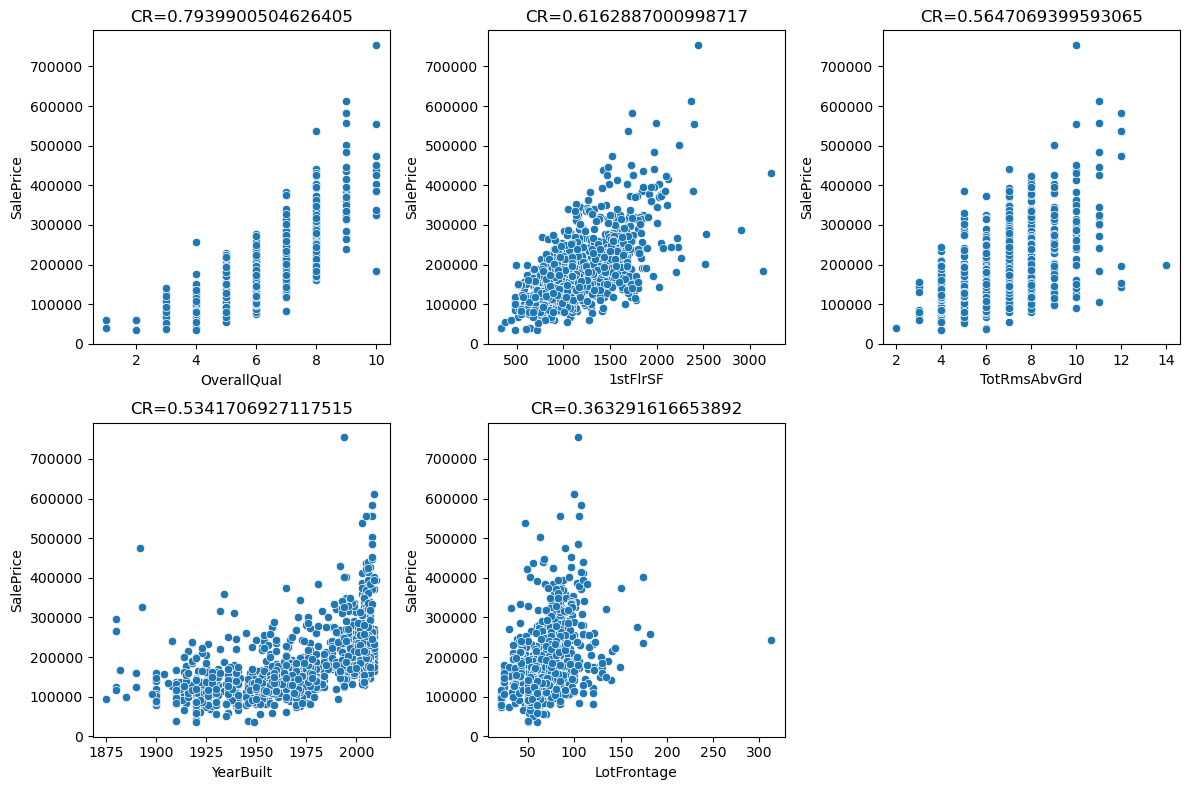

In [47]:
data_array = np.load('proyecto_training_data.npy')
#print(data_array)
df = pd.DataFrame(data_array, columns=["SalePrice","OverallQual", "1stFlrSF","TotRmsAbvGrd","YearBuilt", "LotFrontage"])
#printDataSetInfo(df)
train_df, test_df = slicingDataSet(df)
#correlationCoefficientes(train_df)
showScatterPlotBetweenXandY(train_df,"SalePrice")

#Area
#Calidad de los materiales


In [ ]:
%%bash
echo "Start Script"
if [ -d ".git" ]
then
echo "We can perform the git command"
git add .
git commit -m "update notebook"
echo "Pushing data to remote server!!!"
git push
else
echo "Please add the origin after perform git commands"
fi
echo "Finish Script"